<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Deep Learning Project <br><br> Traffic Signs Recognition
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### Problem Statement

Self-driving cars are gaining traction with the advancement in research in the fields of AI and Deep Learning and the future of mobility is headed towards complete autonomy with no input from the passengers, and the vehicle being able to manuever itself and take decisions independently. But to achieve level 5 autonomy, it is necessary for vehicles to understand and follow all the rules of the road.

In the world of Artificial Intelligence, many researchers and big companies like Tesla, Uber, Google, Mercedes-Benz, Toyota, Ford, Audi, etc are working on autonomous vehicles and self-driving cars. In order to make this technology completely autonomous and road legal, the vehicles should be able to interpret traffic signs and make decisions accordingly.

There are several different types of traffic signs like speed limits, no entry, traffic signals, turn left or right, children crossing, no passing of heavy vehicles, etc. Traffic signs classification is the process of identifying which class a traffic sign belongs to. In this deep learning project, we will build a deep neural network model that can classify traffic signs present in the image into different categories. With this model, we are able to read and understand traffic signs which are a very important task for all autonomous vehicles.

### Dataset Description

For this project, we are using the public dataset available at Kaggle.

The dataset contains about 39,000 images of different traffic signs. It is further classified into 43 different classes. The description of each class is as given below:

- 0: Speed limit (20km/h)


- 1: Speed limit (30km/h)


- 2: Speed limit (50km/h)


- 3: Speed limit (60km/h)


- 4: Speed limit (70km/h) 


- 5: Speed limit (80km/h)


- 6: End of speed limit (80km/h) 


- 7: Speed limit (100km/h)  


- 8: Speed limit (120km/h) 


- 9: No passing


- 10: No passing veh over 3.5 tons  


- 11: Right-of-way at intersection 


- 12: Priority road    


- 13: Yield     


- 14: Stop  


- 15: No vehicles  


- 16: Veh > 3.5 tons prohibited   


- 17: No entry     


- 18: General caution  


- 19: Dangerous curve left 


- 20: Dangerous curve right 


- 21: Double curve  


- 22: Bumpy road  


- 23: Slippery road  


- 24: Road narrows on the right  


- 25: Road work  


- 26: Traffic signals   


- 27: Pedestrians 


- 28: Children crossing  


- 29: Bicycles crossing 


- 30: Beware of ice/snow


- 31: Wild animals crossing  


- 32: End speed + passing limits 


- 33: Turn right ahead  


- 34: Turn left ahead 


- 35: Ahead only  


- 36: Go straight or right 


- 37: Go straight or left


- 38: Keep right   


- 39: Keep left  


- 40: Roundabout mandatory 


- 41: End of no passing   


- 42: End no passing veh > 3.5 tons

##### Importing the required libraries

In [89]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout,GlobalAveragePooling2D

##### Reading the images 

In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

##### Exploratory Data Analysis

In [3]:
data.shape

(39209, 30, 30, 3)

In [4]:
labels.shape

(39209,)

In [5]:
pd.DataFrame(labels).nunique()

0    43
dtype: int64

0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 


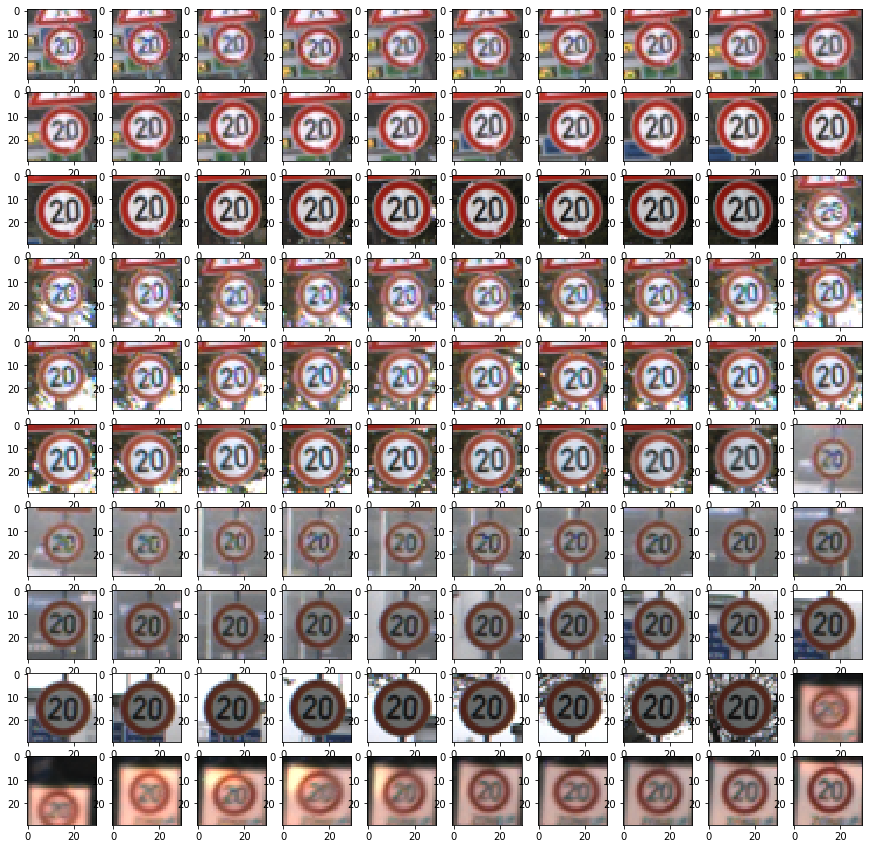

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

columns = 10
rows = 10

fig=plt.figure(figsize=(15,15))

for i in range(1, columns*rows + 1):
    img = data[i]
    fig.add_subplot(rows, columns, i)
    print (labels[i], end=' ')
    if i % columns == 0:
      print ("")
    plt.imshow(img, cmap='gray')

plt.show()

25 
25 25 25 25 25 25 25 25 25 25 
25 25 25 25 25 25 25 25 25 25 
25 25 25 25 25 25 25 25 25 25 
25 25 25 25 25 25 25 25 25 25 
25 25 25 25 25 25 25 25 25 25 
25 25 25 25 25 25 25 25 25 25 
25 25 25 25 25 25 25 25 25 25 
25 25 25 25 25 25 25 25 25 25 
25 25 25 25 25 25 25 25 25 25 
25 25 25 25 25 25 25 25 25 25 


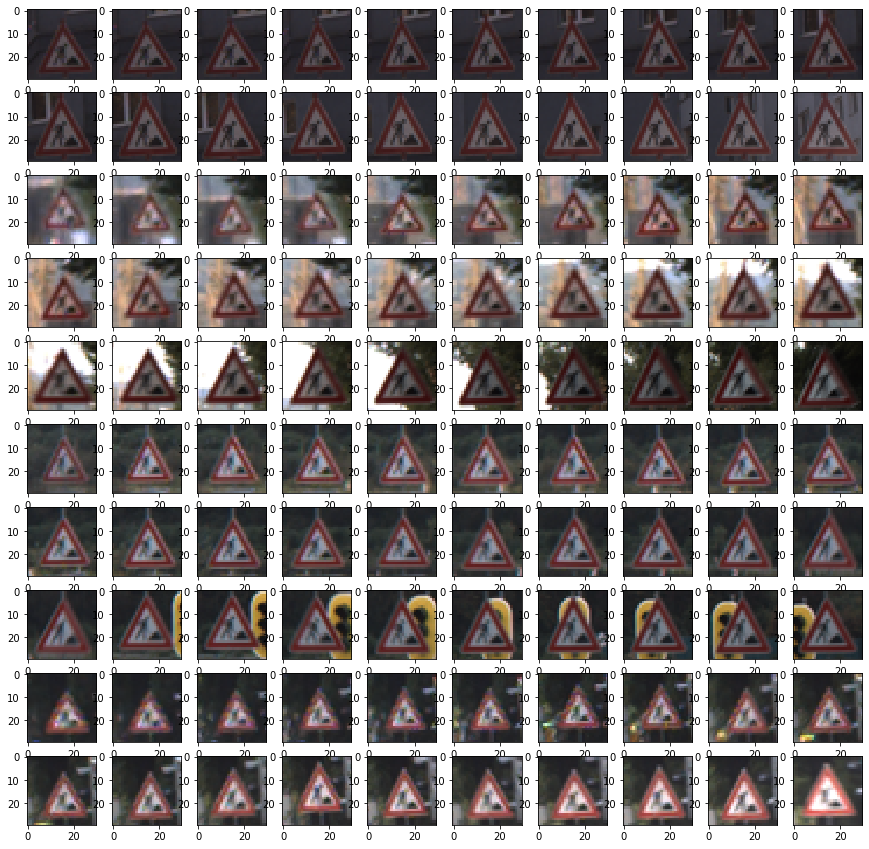

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
from warnings import filterwarnings
filterwarnings('ignore')

columns = 10
rows = 10
j = 1

fig=plt.figure(figsize=(15, 15))

for i in range(29500, 29500 + columns*rows + 1):
    img = data[i]
    fig.add_subplot(rows, columns, j)
    if j < 100:
        j=j+1
    print (labels[i], end=' ')
    if i % columns == 0:
      print ("")
    plt.imshow(img, cmap='gray')
    

plt.show()

35 
35 35 35 35 35 35 35 35 35 35 
35 35 35 35 35 35 35 35 35 35 
35 35 35 35 35 35 35 35 35 35 
35 35 35 35 35 35 35 35 35 35 
35 35 35 35 35 35 35 35 35 35 
35 35 35 35 35 35 35 35 35 35 
35 35 35 35 35 35 35 35 35 35 
35 35 35 35 35 35 35 35 35 35 
35 35 35 35 35 35 35 35 35 35 
35 35 35 35 35 35 35 35 35 35 


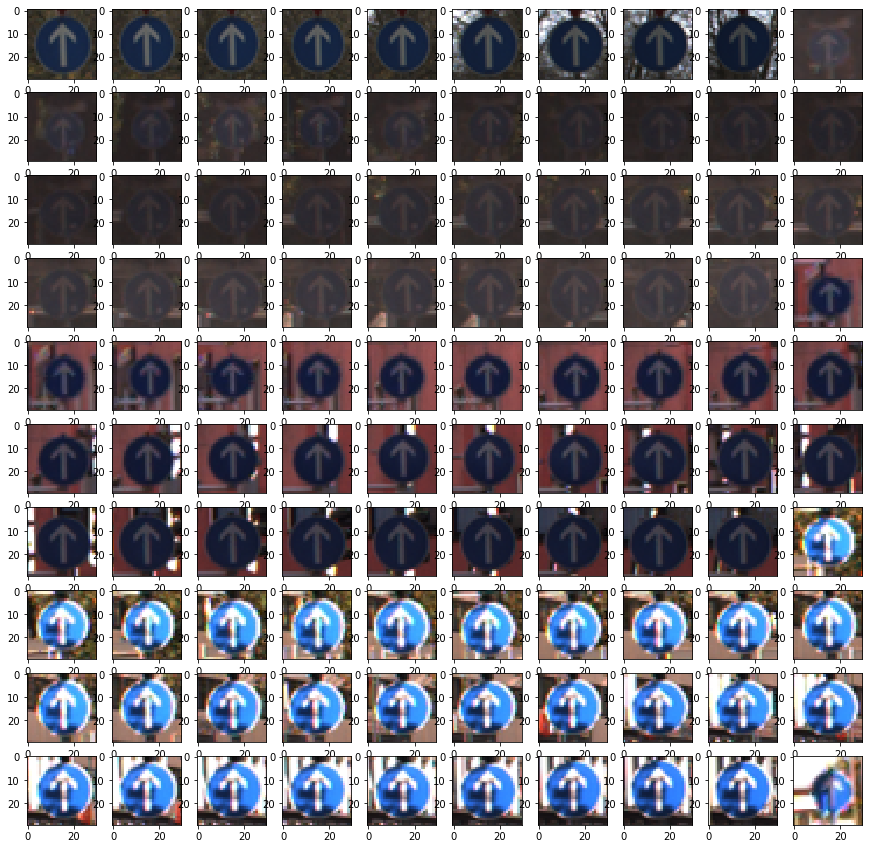

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
from warnings import filterwarnings
filterwarnings('ignore')

columns = 10
rows = 10
j = 1

fig=plt.figure(figsize=(15, 15))

for i in range(35000, 35000 + columns*rows + 1):
    img = data[i]
    fig.add_subplot(rows, columns, j)
    if j < 100:
        j=j+1
    print (labels[i], end=' ')
    if i % columns == 0:
      print ("")
    plt.imshow(img, cmap='gray')
    

plt.show()

##### Train-Test-Split

In [6]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(31367, 30, 30, 3)
(7842, 30, 30, 3)
(31367,)
(7842,)


### Base Model

In [7]:
#Building the model
base_model = Sequential()
base_model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=X_train.shape[1:]))
base_model.add(MaxPool2D(pool_size=(2, 2)))
base_model.add(Flatten())
base_model.add(Dense(64, activation='relu'))
base_model.add(Dense(43, activation='softmax'))

#Compilation of the model
base_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
epochs = 10
base_result = base_model.fit(X_train, y_train, batch_size=1000, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
32/32 [==============================] - 4s 103ms/step - loss: 15.8420 - accuracy: 0.0459 - val_loss: 3.7532 - val_accuracy: 0.0574
Epoch 2/10
32/32 [==============================] - 3s 101ms/step - loss: 3.7444 - accuracy: 0.0562 - val_loss: 3.7368 - val_accuracy: 0.0576
Epoch 3/10
32/32 [==============================] - 3s 101ms/step - loss: 3.7287 - accuracy: 0.0564 - val_loss: 3.7210 - val_accuracy: 0.0574
Epoch 4/10
32/32 [==============================] - 3s 101ms/step - loss: 3.7132 - accuracy: 0.0549 - val_loss: 3.7056 - val_accuracy: 0.0578
Epoch 5/10
32/32 [==============================] - 3s 101ms/step - loss: 3.6982 - accuracy: 0.0545 - val_loss: 3.6905 - val_accuracy: 0.0576
Epoch 6/10
32/32 [==============================] - 3s 101ms/step - loss: 3.6836 - accuracy: 0.0546 - val_loss: 3.6755 - val_accuracy: 0.0581
Epoch 7/10
32/32 [==============================] - 3s 101ms/step - loss: 3.6696 - accuracy: 0.0546 - val_loss: 3.6616 - val_accuracy: 0.0581
Epoch

### Model Optimization - 1

In [9]:
from tensorflow.keras import regularizers, optimizers
def train_and_test_model(iterations,lr,lamda):
    
    iterations=iterations
    learning_rate=lr
    hidden_nodes=256
    output_nodes=43
    
    #Building the model
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(43, activation='softmax'))

    #Compilation of the model
    sgd=optimizers.SGD(lr=learning_rate)
    model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
    
    model.fit(X_train,y_train,epochs=iterations,batch_size=1000,validation_data=(X_test, y_test),verbose=1)
    [loss,score_train]=model.evaluate(X_train,y_train)
    [loss,score_test]=model.evaluate(X_test,y_test)
    
    return score_train,score_test

In [10]:
#Coarse tune
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-7.0, 3.0))
    Lambda = math.pow(10, np.random.uniform(-7,-2))
    best_acc = train_and_test_model(10, lr, Lambda)
    print('k:',k,'epocs:',10,'accuracy:',best_acc,'alpha:', lr,'Regularization:',Lambda)

C:\Users\Python\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
32/32 [==============================] - 9s 266ms/step - loss: 86.4748 - accuracy: 0.0192 - val_loss: 79.0031 - val_accuracy: 0.0186
Epoch 2/10
32/32 [==============================] - 9s 292ms/step - loss: 73.6773 - accuracy: 0.0185 - val_loss: 67.5301 - val_accuracy: 0.0185
Epoch 3/10
32/32 [==============================] - 11s 341ms/step - loss: 63.7064 - accuracy: 0.0182 - val_loss: 59.2871 - val_accuracy: 0.0175
Epoch 4/10
32/32 [==============================] - 11s 339ms/step - loss: 56.9782 - accuracy: 0.0172 - val_loss: 53.9383 - val_accuracy: 0.0167
Epoch 5/10
32/32 [==============================] - 11s 340ms/step - loss: 52.4186 - accuracy: 0.0161 - val_loss: 50.0033 - val_accuracy: 0.0158
Epoch 6/10
32/32 [==============================] - 12s 360ms/step - loss: 48.8298 - accuracy: 0.0162 - val_loss: 46.7268 - val_accuracy: 0.0170
Epoch 7/10
32/32 [==============================] - 12s 378ms/step - loss: 45.7754 - accuracy: 0.0165 - val_loss: 43.9010 - val_accu

Epoch 10/10
246/246 [==============================] - 1s 5ms/step - loss: 3.6342 - accuracy: 0.1225
k: 5 epocs: 10 accuracy: (0.11869161576032639, 0.1225452721118927) alpha: 0.001609022106682776 Regularization: 0.00027808077202013147
Epoch 1/10
32/32 [==============================] - 12s 363ms/step - loss: nan - accuracy: 0.0163 - val_loss: nan - val_accuracy: 0.0048
Epoch 2/10
32/32 [==============================] - 12s 360ms/step - loss: nan - accuracy: 0.0055 - val_loss: nan - val_accuracy: 0.0048
Epoch 3/10
32/32 [==============================] - 12s 363ms/step - loss: nan - accuracy: 0.0055 - val_loss: nan - val_accuracy: 0.0048
Epoch 4/10
32/32 [==============================] - 11s 359ms/step - loss: nan - accuracy: 0.0055 - val_loss: nan - val_accuracy: 0.0048
Epoch 5/10
32/32 [==============================] - 11s 359ms/step - loss: nan - accuracy: 0.0055 - val_loss: nan - val_accuracy: 0.0048
Epoch 6/10
32/32 [==============================] - 12s 360ms/step - loss: nan -

In [11]:
lr=0.00001
lamda=0
train_and_test_model(100,lr,lamda)

Epoch 1/100
32/32 [==============================] - 11s 344ms/step - loss: 24.9905 - accuracy: 0.0520 - val_loss: 16.7082 - val_accuracy: 0.0645
Epoch 2/100
32/32 [==============================] - 11s 341ms/step - loss: 14.6135 - accuracy: 0.0651 - val_loss: 12.2644 - val_accuracy: 0.0669
Epoch 3/100
32/32 [==============================] - 11s 339ms/step - loss: 11.4843 - accuracy: 0.0674 - val_loss: 10.3116 - val_accuracy: 0.0747
Epoch 4/100
32/32 [==============================] - 12s 361ms/step - loss: 9.9540 - accuracy: 0.0707 - val_loss: 9.2069 - val_accuracy: 0.0793
Epoch 5/100
32/32 [==============================] - 12s 377ms/step - loss: 9.0027 - accuracy: 0.0773 - val_loss: 8.4493 - val_accuracy: 0.0837
Epoch 6/100
32/32 [==============================] - 12s 375ms/step - loss: 8.3182 - accuracy: 0.0826 - val_loss: 7.8831 - val_accuracy: 0.0886
Epoch 7/100
32/32 [==============================] - 12s 375ms/step - loss: 7.7853 - accuracy: 0.0878 - val_loss: 7.4260 - val_acc

(0.3006981909275055, 0.2943126857280731)

### Model Optimization - 2

In [24]:
#Building the model
final_cnn_model = Sequential()
final_cnn_model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
final_cnn_model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
final_cnn_model.add(MaxPool2D(pool_size=(2, 2)))
final_cnn_model.add(Dropout(rate=0.25))
final_cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
final_cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
final_cnn_model.add(MaxPool2D(pool_size=(2, 2)))
final_cnn_model.add(Dropout(rate=0.25))
final_cnn_model.add(Flatten())
final_cnn_model.add(Dense(256, activation='relu'))
final_cnn_model.add(Dropout(rate=0.5))
final_cnn_model.add(Dense(43, activation='softmax'))

#Compilation of the model
final_cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
epochs = 15
history = final_cnn_model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
final_cnn_model.save("final_cnn_model.h5")

Epoch 1/15
981/981 [==============================] - 50s 50ms/step - loss: 2.0342 - accuracy: 0.4817 - val_loss: 0.5480 - val_accuracy: 0.8681
Epoch 2/15
981/981 [==============================] - 52s 53ms/step - loss: 0.7000 - accuracy: 0.7970 - val_loss: 0.1969 - val_accuracy: 0.9462
Epoch 3/15
981/981 [==============================] - 51s 52ms/step - loss: 0.4201 - accuracy: 0.8769 - val_loss: 0.1102 - val_accuracy: 0.9727
Epoch 4/15
981/981 [==============================] - 53s 54ms/step - loss: 0.3114 - accuracy: 0.9117 - val_loss: 0.0803 - val_accuracy: 0.9779
Epoch 5/15
981/981 [==============================] - 54s 55ms/step - loss: 0.2626 - accuracy: 0.9242 - val_loss: 0.0904 - val_accuracy: 0.9748
Epoch 6/15
981/981 [==============================] - 54s 55ms/step - loss: 0.2446 - accuracy: 0.9313 - val_loss: 0.0607 - val_accuracy: 0.9842
Epoch 7/15
981/981 [==============================] - 52s 53ms/step - loss: 0.2213 - accuracy: 0.9378 - val_loss: 0.0577 - val_accuracy:

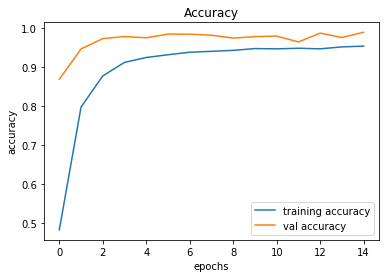

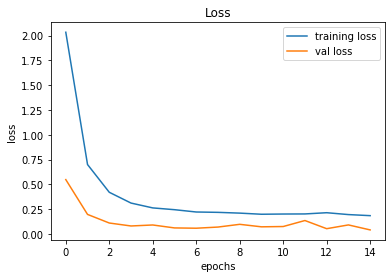

In [26]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [27]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = final_cnn_model.predict_classes(X_test)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.9580364212193191


# Transfer Learning

### Model - 4 - Prediction using Xception Base Model

In [28]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils

import numpy as np

In [64]:
xception=tf.keras.applications.Xception()

img=image.load_img('test_image.png',target_size=(299,299))
img_ar=image.img_to_array(img)
print(img_ar.shape)

img_ar_ex=np.expand_dims(img_ar,axis=0)
print(img_ar_ex.shape)

img_p=tf.keras.applications.mobilenet.preprocess_input(img_ar_ex)

(299, 299, 3)
(1, 299, 299, 3)


In [65]:
img_p.shape

(1, 299, 299, 3)

In [67]:
filterwarnings('ignore')
pred=xception.predict(img_p)

In [68]:
len(pred[0]) # trained for 1000 classes

1000

In [69]:
pred.max()

0.626821

In [70]:
pred.argmax()

919

In [71]:
imagenet_utils.decode_predictions(pred)

[[('n06794110', 'street_sign', 0.626821),
  ('n02877765', 'bottlecap', 0.13319196),
  ('n03459775', 'grille', 0.021178301),
  ('n03379051', 'football_helmet', 0.01660721),
  ('n04019541', 'puck', 0.015966374)]]

# Model 5 - Feature Extraction - Transfer Learning

In [72]:
# 2. Feature Extraction - Transfer Learning
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [73]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [74]:
training_set=train_datagen.flow_from_directory('C:\\Users\\Darshan R\\Desktop\\Project\\Training_new',
                                              target_size=(299,299),
                                              batch_size=32,
                                              class_mode='categorical')

Found 258 images belonging to 43 classes.


In [77]:
test_set=test_datagen.flow_from_directory('C:\\Users\\Darshan R\\Desktop\\Project\\Testing_new',
                                              target_size=(299,299),
                                              batch_size=10,
                                              class_mode='categorical')

Found 129 images belonging to 43 classes.


In [78]:
root_model=tf.keras.applications.Xception()

In [83]:
root_model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_8[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [85]:
root_model=tf.keras.applications.Xception(input_shape=(71,71,3),include_top=False)

In [86]:
root_model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 71, 71, 3)]  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 35, 35, 32)   864         input_11[0][0]                   
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 35, 35, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 35, 35, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [87]:
root_model.trainable=False
root_model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 71, 71, 3)]  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 35, 35, 32)   864         input_11[0][0]                   
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 35, 35, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 35, 35, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [101]:
transfer_model=Sequential([root_model,
                          GlobalAveragePooling2D(),
                          Dense(512,activation='relu'),
                          Dense(43,activation='softmax')])
transfer_model.summary()

Model: "sequential_220"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 3, 3, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d_8 ( (None, 2048)              0         
_________________________________________________________________
dense_440 (Dense)            (None, 512)               1049088   
_________________________________________________________________
dense_441 (Dense)            (None, 43)                22059     
Total params: 21,932,627
Trainable params: 1,071,147
Non-trainable params: 20,861,480
_________________________________________________________________


In [102]:
transfer_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [103]:
transfer_model.fit_generator(training_set,
                            steps_per_epoch=258//32,
                            epochs=30,
                            validation_data=test_set,
                            validation_steps=128//10)

Epoch 1/30
8/8 [==============================] - 43s 5s/step - loss: 3.8070 - accuracy: 0.0265 - val_loss: 3.2845 - val_accuracy: 0.0833
Epoch 2/30
8/8 [==============================] - 46s 6s/step - loss: 3.0052 - accuracy: 0.2080 - val_loss: 2.7158 - val_accuracy: 0.3750
Epoch 3/30
8/8 [==============================] - 46s 6s/step - loss: 2.4623 - accuracy: 0.3761 - val_loss: 2.2740 - val_accuracy: 0.4583
Epoch 4/30
8/8 [==============================] - 46s 6s/step - loss: 1.9443 - accuracy: 0.5664 - val_loss: 1.8738 - val_accuracy: 0.5417
Epoch 5/30
8/8 [==============================] - 45s 6s/step - loss: 1.5743 - accuracy: 0.6283 - val_loss: 1.4920 - val_accuracy: 0.7250
Epoch 6/30
8/8 [==============================] - 47s 6s/step - loss: 1.2080 - accuracy: 0.7743 - val_loss: 1.3254 - val_accuracy: 0.6750
Epoch 7/30
8/8 [==============================] - 46s 6s/step - loss: 1.0623 - accuracy: 0.7566 - val_loss: 1.1650 - val_accuracy: 0.7583
Epoch 8/30
8/8 [==================

# Model 6 - Fine Tuning - Transfer Learning

In [144]:
final_root_model=tf.keras.applications.Xception(input_shape=(71,71,3),include_top=False)

In [145]:
final_root_model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 71, 71, 3)]  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 35, 35, 32)   864         input_17[0][0]                   
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 35, 35, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 35, 35, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [146]:
for layer in final_root_model.layers[:81]:
    layer.trainable=False

In [151]:
fine_transfer_model=Sequential([final_root_model,
                          GlobalAveragePooling2D(),
                          Dense(512,activation='relu'),
                          Dense(43,activation='softmax')])
fine_transfer_model.summary()

Model: "sequential_232"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 3, 3, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d_20  (None, 2048)              0         
_________________________________________________________________
dense_464 (Dense)            (None, 512)               1049088   
_________________________________________________________________
dense_465 (Dense)            (None, 43)                22059     
Total params: 21,932,627
Trainable params: 13,240,907
Non-trainable params: 8,691,720
_________________________________________________________________


In [152]:
fine_transfer_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [153]:
fine_transfer_model.fit_generator(training_set,
                            steps_per_epoch=258//32,
                            epochs=50,
                            validation_data=test_set,
                            validation_steps=128//10)

Epoch 1/50
8/8 [==============================] - 73s 9s/step - loss: 2.2872 - accuracy: 0.5619 - val_loss: 0.3711 - val_accuracy: 0.9500
Epoch 2/50
8/8 [==============================] - 74s 9s/step - loss: 0.3939 - accuracy: 0.9425 - val_loss: 0.4296 - val_accuracy: 0.9167
Epoch 3/50
8/8 [==============================] - 74s 9s/step - loss: 0.1717 - accuracy: 0.9779 - val_loss: 0.8124 - val_accuracy: 0.9000
Epoch 4/50
8/8 [==============================] - 77s 10s/step - loss: 0.1145 - accuracy: 0.9779 - val_loss: 0.6973 - val_accuracy: 0.9250
Epoch 5/50
8/8 [==============================] - 281s 39s/step - loss: 0.1427 - accuracy: 0.9735 - val_loss: 0.2414 - val_accuracy: 0.9667
Epoch 6/50
8/8 [==============================] - 80s 10s/step - loss: 0.0468 - accuracy: 0.9922 - val_loss: 0.2789 - val_accuracy: 0.9583
Epoch 7/50
8/8 [==============================] - 73s 9s/step - loss: 0.0375 - accuracy: 0.9956 - val_loss: 0.0973 - val_accuracy: 0.9833
Epoch 8/50
8/8 [==============